#### 동영상 출력
- https://www.pexels.com/ko-kr/

In [1]:
import cv2
cap = cv2.VideoCapture('./data/happyCat_25fps.mp4')
# 영상이 언제 끝날지 모름
# -- 사진 몇 장 출력될지 모르지만, 계속됨
while True:
    ret, frame = cap.read() # ret: 성공여부(True, False), frame: 받아온 이미지(프레임)
    if not ret:
        print('동영상 재생 끝')
        break
    # 동영상 frame 출력
    cv2.imshow('happyCat_25fps',frame)
    
    if cv2.waitKey(26) == ord('q'):
        print('동영상 종료')
        break
# 카메라, 동영상 cap기능 상실
cap.release() # 자원해제
cv2.destroyAllWindows() # 모든 창 닫기

동영상 종료


- cv2.waitKey(delay) 함수: 프레임간의 간격을 제어하고 사용자의 입력을 처리할 수 있음
  - 주어진 시간(밀리초) 동안 사용자의 키 입력을 기다림, 사용자의 입력이 들어올때가지 대기하며, 해당 키의 아스키 코드를 반환
  - 매개변수 delay는 대기 시간을 나타내는 값으로 밀리초 단위. 30이 적히면 30밀리초 동안 사용자의 키 입력 대기
  - 1000ms는 1s 대기, 500ms는 0.5s 대기, 0은 무한대기

#### 카메라 출력

In [2]:
import cv2
# cap = cv2.VideoCapture('./data/happyCat_25fps.mp4')   # 동영상 파일 연결
cap = cv2.VideoCapture(1)     # 1번 카메라 연결

while True:
    ret, frame = cap.read()
    if not ret:
        print('동영상 재생 끝')
        break
    # 동영상 frame 출력
    cv2.imshow('camera capture',frame)
    
    if cv2.waitKey(26) == ord('q'):
        print('동영상 종료')
        break

cap.release() # 자원해제
cv2.destroyAllWindows()

동영상 종료


In [3]:
import cv2
# 카메라가 안읽어질 때, cv2 에러 -> 커널 다운
try:
    cap = cv2.VideoCapture('./data/happyCat_25fps.mp4')
    print('비디오 캡쳐 시작')
except:
    print('비디오 캡쳐 실패')

cnt=0
while True:
    ret, frame = cap.read()
    if not ret:
        print('비디오 읽기 실패 또는 비디오 모두 읽음')
        break

    cv2.imshow('camera capture',frame) # 출력하는 코드
    key = cv2.waitKey(33)
    
    if key == ord('q'):
        print('동영상 종료')
        break
    # 'w' frame 저장(사진찍기)
    if key == ord('w'):
        # 저장 기능 연결
        cnt += 1
        print(f'./data/cat{cnt}.png 파일 저장')
        cv2.imwrite(f'./data/cat{cnt}.png', frame, params=[cv2.IMWRITE_PNG_COMPRESSION,0])   # COMPRESSION:압축률 0은 압축하지 않는다는 의미

cap.release()
cv2.destroyAllWindows()

SyntaxError: invalid syntax (1262326594.py, line 26)

#### 카메라를 출력(capture)하고 frame 단위로 이미지 저장

In [ ]:
import cv2
# 카메라가 안읽어질 때, cv2 에러 -> 커널 다운
try:
    cap = cv2.VideoCapture(1)
    print('비디오 캡쳐 시작')
except:
    print('비디오 캡쳐 실패')

cnt=0
while True:
    ret, frame = cap.read()
    if not ret:
        print('비디오 읽기 실패 또는 비디오 모두 읽음')
        break

    cv2.imshow('camera capture',frame) # 출력하는 코드
    key = cv2.waitKey(33)
    
    if key == ord('q'):
        print('동영상 종료')
        break
    # 'w' frame 저장(사진찍기)
    if key == ord('w'):
        # 저장 기능 연결
        cnt += 1
        print(f'./data/cam{cnt}.png 파일 저장')
        cv2.imwrite(f'./data/cam{cnt}.png', frame, params=[cv2.IMWRITE_PNG_COMPRESSION,0])   # COMPRESSION:압축률 0은 압축하지 않는다는 의미

cap.release()
cv2.destroyAllWindows()

#### 저장된 이미지 불러와서 인생네컷처럼 표현하기

In [ ]:
import matplotlib.pyplot as plt

for i in range(1,5):
    selca = cv2.imread(f"./data/cam{i}.png")
    # plt. brg -> rgb
    selca = cv2.cvtColor(selca, cv2.COLOR_BGR2RGB)
    
    # subplot()
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.title(f'selca{i}')
    plt.imshow(selca)

In [ ]:
import matplotlib.pyplot as plt

for i in range(1,5):
    cat = cv2.imread(f"./data/cat{i}.png")
    # plt. brg -> rgb
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
    
    # subplot()
    plt.subplot(2,2,i)
    plt.axis('off')
    plt.title(f'cat{i}')
    plt.imshow(cat)

- cv2.imwrite() : 현재 프레임을 저장
  - filename : 저장할 파일 이름
  - frame : 저장할 프레임
  - params=[cv2.IMWRITE_PNG_COMPRESSION, 0]) : 압축 하지 않는 PNG, 세 번째 파라미터는 압축률로 0~9까지 설정 가능 (0은 압축 없음)
- pic.png 파일이 저장되었는지 확인

----

#### 얼굴영역 선택해서 바운딩박스 표현하기
- Bounding Box(경계선 박스, 영역 박스 표시): 사각형의 박스모양 표시
- 이미지 위에 사각형 도형을 좌표를 찍어서 그리는 실습

In [ ]:
!pip list

In [ ]:
# X,Y
# 열,행

- cv2.rectangle(): 사각형 그리는 기능
  <br><br>
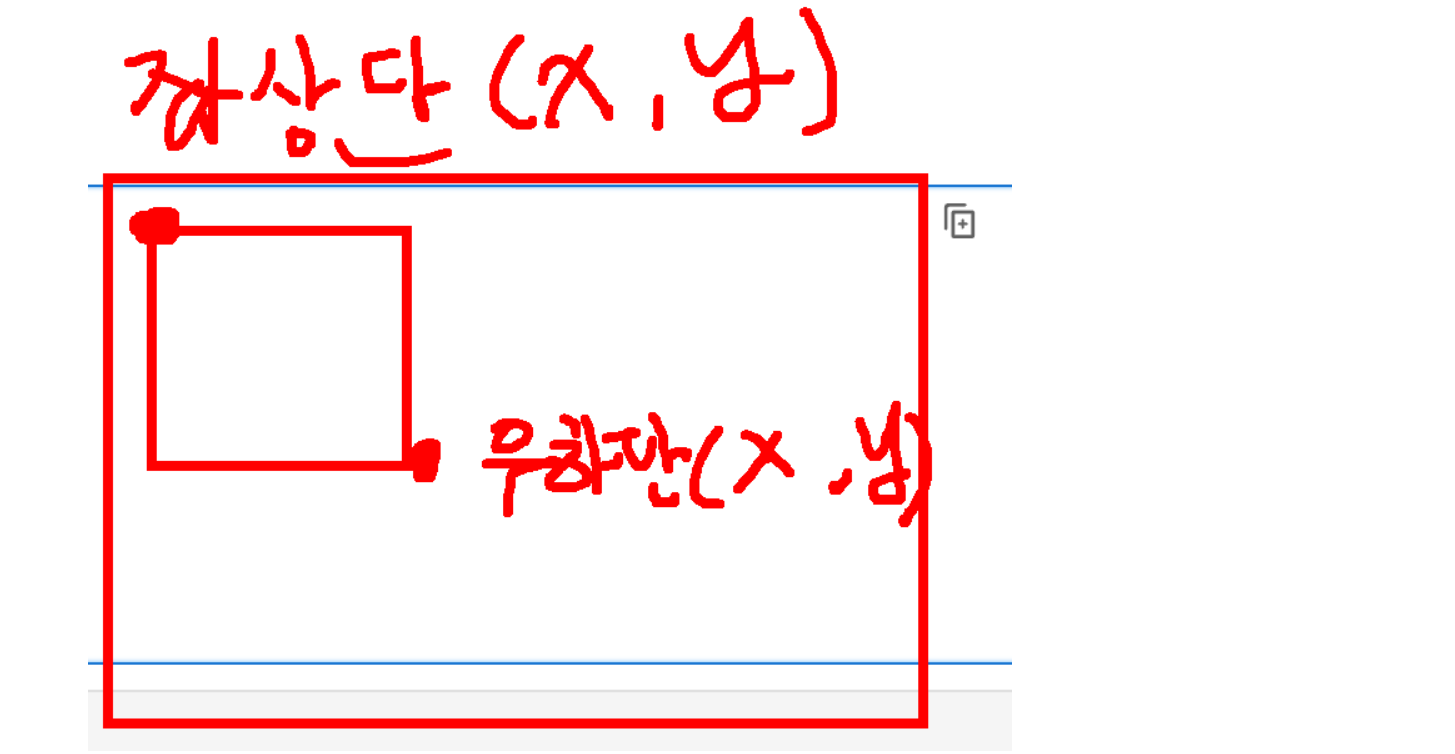

In [ ]:
# 예시
import cv2
import numpy as np
# 검은색 배경의 배열 이미지 생성
img = np.zeros((480,640,3))  # 컬러이미지
# cv2.rectangle(img,(x,y),(x,y), 색상, 두께)
cv2.rectangle(img, (0,0),(320,240), [255,0,0], 5)  # 속이 빈 사각형, 선의 두께 지정
cv2.rectangle(img, (0,240),(400,480), [255,255,0], cv2.FILLED)  # 속이 찬 사각형, 두께를 지정하지 않고 cv2.FILLED

cv2.imshow('zeros',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### text 표현하기

In [ ]:
img = np.zeros((480,640,3))

cv2.rectangle(img, (0,0),(320,240), [255,0,0], 5)
cv2.rectangle(img, (0,240),(400,480), [255,255,0], cv2.FILLED)

# 텍스트 추가: cv2.putText(배경이미지, 텍스트내용, 시작위치(x,y), 폰트종류, 크기, 색상, 두께)
cv2.putText(img, 'Happy cat', (20,200), cv2.FONT_HERSHEY_PLAIN,4,[0,255,255],4)
cv2.putText(img, 'cat face', (20,400), cv2.FONT_HERSHEY_DUPLEX,3,[255,0,0],3)
cv2.putText(img, 'cat face', (400,200), cv2.FONT_HERSHEY_PLAIN,3,[200,100,155],3)
cv2.imshow('zeros',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- cat 이미지 1장 불러와서 얼굴 1개의 B-Box 표시하고, 텍스트로 00's face 출력하기

In [14]:
import matplotlib.pyplot as plt

cat_img = cv2.imread('./data/cat3.png')
# plt.axis('off')
# plt.show()

cv2.rectangle(cat_img,(200,110),(350,240),[0,150,255],4)
cv2.putText(cat_img,"cat's face",(160,100), cv2.FONT_HERSHEY_PLAIN, 3,[0,150,255],3)
cv2.imshow('cat_face',cat_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### cvlib 얼굴 영역 인식하기
- !pip install cvlib
- 얼굴 영역 확인 코드 실행

In [7]:
# !pip install cvlib

In [2]:
import cv2 # opencv
import cvlib as cv  # cvlib
import numpy as np

In [28]:
img = cv2.imread('./data/cam2.png')

faces,confs = cv.detect_face(img)
print(faces,confs)
# (얼굴좌표(x,y,x,y), 확신하는 정도(confidence))

cv2.rectangle(img,(faces[0][0],faces[0][1]),(faces[0][2],faces[0][3]),[0,150,255],4)
cv2.putText(img,"face",(faces[0][0],faces[0][0]-100), cv2.FONT_HERSHEY_PLAIN, 3,[0,150,255],3)
cv2.imshow('face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[np.int64(257), np.int64(195), np.int64(369), np.int64(349)]] [np.float32(0.99347275)]


#### 카메라에서 얼굴 탐지해서 B-Box 표시하기

In [12]:
cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()
    if not ret:
        print('동영상 재생 끝')
        break
    # 얼굴 탐지
    faces,confs = cv.detect_face(frame)
    # 얼굴 여러개 탐지 경우
    for (x,y,x2,y2), conf in zip(faces,confs):
        cv2.rectangle(frame,(x,y),(x2,y2),[0,150,255],4)
        data_conf = conf*100
        cv2.putText(frame,f'{data_conf:.2f}%',(x,y-50), cv2.FONT_HERSHEY_PLAIN, 2,[0,150,255],2)

    cv2.imshow('camera capture', frame)
    if cv2.waitKey(33) == ord('q'):
        print('동영상을 종료')
        break
 
cap.release()
cv2.destroyAllWindows()

동영상을 종료


In [ ]:
for i, face in enumerate(faces):
            # 얼굴 주위에 사각형 그리기
            cv2.rectangle(frame, (face[0], face[1]), (face[2], face[3]), color, line_th)
            # 얼굴 위에 신뢰도 표시
            cv2.putText(frame, f'{conf[i]:.2f}', (face[0], face[1] - 10), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)